
## Introduction

The purpose of this section is to clean the data and make sure that each column is in the correct format.  The total dimensions of the dataframe are (1306890, 91).  The first 7 columns describe geographical and temporal details about the location.  The rest of the data is separated into 3 sections of observations: hourly, daily, and monthly.  Furthermore, the climatology measures include temperature, dew point, humidity, winds, sky condition, weather type, atmospheric pressure and more.  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
d = pd.read_csv("weather_data.csv", header = 0, low_memory = False)

In [3]:
d.head()

,Unnamed: 0,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,REPORTTPYE,HOURLYSKYCONDITIONS,HOURLYVISIBILITY,...,MonthlyMaxSeaLevelPressureTime,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureDate,MonthlyMinSeaLevelPressureTime,MonthlyTotalHeatingDegreeDays,MonthlyTotalCoolingDegreeDays,MonthlyDeptFromNormalHeatingDD,MonthlyDeptFromNormalCoolingDD,MonthlyTotalSeasonToDateHeatingDD,MonthlyTotalSeasonToDateCoolingDD
0,1,WBAN:93721,BALTIMORE WASHINGTON INTERNATIONAL AIRPORT MD US,47.5,39.1733,-76.684,2018-01-01 00:54,FM-15,CLR:00,10,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
1,2,WBAN:93721,BALTIMORE WASHINGTON INTERNATIONAL AIRPORT MD US,47.5,39.1733,-76.684,2018-01-01 01:00,FM-12,NaN,NaN,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
2,3,WBAN:93721,BALTIMORE WASHINGTON INTERNATIONAL AIRPORT MD US,47.5,39.1733,-76.684,2018-01-01 01:54,FM-15,CLR:00,10,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
3,4,WBAN:93721,BALTIMORE WASHINGTON INTERNATIONAL AIRPORT MD US,47.5,39.1733,-76.684,2018-01-01 02:54,FM-15,CLR:00,10,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN
4,5,WBAN:93721,BALTIMORE WASHINGTON INTERNATIONAL AIRPORT MD US,47.5,39.1733,-76.684,2018-01-01 03:54,FM-15,CLR:00,10,...,-9999,NaN,-9999,-9999,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Take a peek at the data types of each column index

for c in d:
    print(c, d[c].values.dtype)

Unnamed: 0 int64
STATION object
STATION_NAME object
ELEVATION float64
LATITUDE float64
LONGITUDE float64
DATE object
REPORTTPYE object
HOURLYSKYCONDITIONS object
HOURLYVISIBILITY object
HOURLYPRSENTWEATHERTYPE object
HOURLYDRYBULBTEMPF object
HOURLYDRYBULBTEMPC object
HOURLYWETBULBTEMPF float64
HOURLYWETBULBTEMPC float64
HOURLYDewPointTempF object
HOURLYDewPointTempC object
HOURLYRelativeHumidity float64
HOURLYWindSpeed object
HOURLYWindDirection object
HOURLYWindGustSpeed object
HOURLYStationPressure object
HOURLYPressureTendency float64
HOURLYPressureChange object
HOURLYSeaLevelPressure object
HOURLYPrecip object
HOURLYAltimeterSetting object
DAILYMaximumDryBulbTemp float64
DAILYMinimumDryBulbTemp float64
DAILYAverageDryBulbTemp float64
DAILYDeptFromNormalAverageTemp float64
DAILYAverageRelativeHumidity float64
DAILYAverageDewPointTemp float64
DAILYAverageWetBulbTemp float64
DAILYHeatingDegreeDays float64
DAILYCoolingDegreeDays float64

DAILYSunrise int64
DAILYSunset int64
DAILYWeath

### Reduce the dimensions of study to hourly and view the various locations.

In [5]:
hourlies = d.iloc[:,1:27]

In [6]:
locations = list(np.unique(hourlies['STATION_NAME']))
locations

['AKRON CANTON AIRPORT OH US',
 'ALAMOSA SAN LUIS VALLEY REGIONAL AIRPORT CO US',
 'ALBUQUERQUE INTERNATIONAL AIRPORT NM US',
 'BALTIMORE WASHINGTON INTERNATIONAL AIRPORT MD US',
 'BEND MUNICIPAL AIRPORT OR US',
 'BURLINGTON WEATHER SERVICE OFFICE AIRPORT VT US',
 'CARIBOU WEATHER FORECAST OFFICE ME US',
 'CHARLESTON INTL. AIRPORT SC US',
 'DETROIT CITY AIRPORT MI US',
 'GRAND FORKS INTERNATIONAL AIRPORT ND US',
 'GREAT FALLS AIRPORT MT US',
 'HOUSTON WILLIAM P HOBBY AIRPORT TX US',
 'HUNTSVILLE INTERNATIONAL AIRPORT JONES FIELD AL US',
 'JACKSONVILLE INTERNATIONAL AIRPORT FL US',
 'MERCURY DESERT ROCK AIRPORT NV US',
 'MINNEAPOLIS ST PAUL INTERNATIONAL AIRPORT MN US',
 'NEW ORLEANS AIRPORT LA US',
 'POCATELLO REGIONAL AIRPORT ID US',
 'SEATTLE TACOMA INTERNATIONAL AIRPORT WA US',
 'WICHITA DWIGHT D. EISENHOWER NATIONAL AIRPORT KS US']

### Explore the distribution of null values with a heatmap.

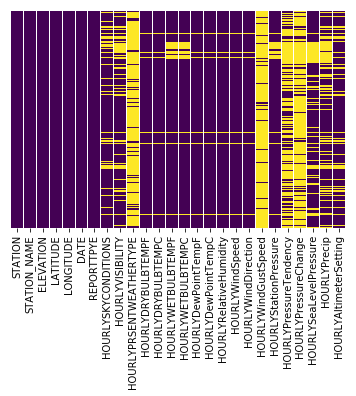

In [7]:
sns.heatmap(hourlies.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Data Clean Section 2

Pressure came in several different measurements, and I choose to keep the ones with the most data available.  Here is a description of the remaining measures of pressure:

HOURLYSeaLevelPressure is the measure of direct sea level pressure at that location. Given in inches of Mercury (in Hg). 
HOURLYStationPressure is the measure of pressure at that station and is not adjusted to sea level pressure.
HOURLYAltimterPressure is atmospheric pressure reduced to sea level using temperature profile of the “standard” atmosphere. Given in inches of Mercury (in Hg). 

In this section, I removed redundant variables and attempted a clean on 'HOURLYPrecip'.  Note that in HOURLYPrecip, 'T' statnds for trace amounts of precipation.

Also, in general, 's' stands for a suspect measurement.  I choose to remove the s's, for better or worse.  

In [8]:
hourlies.drop(['HOURLYPRSENTWEATHERTYPE', 'HOURLYWindGustSpeed', 
               'HOURLYPressureTendency', 'HOURLYPressureChange'], axis=1, inplace=True)
hourlies.drop(['HOURLYDRYBULBTEMPC', 'HOURLYWETBULBTEMPC', 'HOURLYDewPointTempC'], axis = 1, inplace = True)

### HOURLYPrecip

Attempt to clean the 'HOURLYPrecip' category. Replace trace amounts, 'T' with a 0.  Strip the 's' from suspect measurements.  Strip some random strings and spaces.

In [9]:
#Errors were found with hourlies[''HOURLYPrecip'] = hourlies['HOURLYPrecip'].astype('float64', errors = 'raise') 
hourlies['HOURLYPrecip'] = hourlies['HOURLYPrecip'].str.strip('s')
hourlies['HOURLYPrecip'] = hourlies['HOURLYPrecip'].str.strip('0.130.04') 
hourlies['HOURLYPrecip'] = hourlies['HOURLYPrecip'].str.strip('06020s000.00020')

In [10]:
hourlies['HOURLYPrecip'] = hourlies['HOURLYPrecip'].str.replace('T', '0')
hourlies['HOURLYPrecip'] = hourlies['HOURLYPrecip'].str.replace('', '0')

The next step in cleaning HOURLYPrecip was to determine if the 'NaN' values were mostly squished between measurements of no percipation.  It appears that 100% of them were, so we can set all 'NaN' values to 0.

In [11]:
Precip = hourlies['HOURLYPrecip']
locs = np.where(Precip.str.contains('NaN'))
store_zeros = []

for i in locs:
    store_zeros.append(Precip[i-1])

len(store_zeros[store_zeros == 0])/np.shape(locs)[1]

1.0

In [12]:
hourlies['HOURLYPrecip'].fillna(value = 0, inplace = True)

In [13]:
hourlies['HOURLYPrecip'] = hourlies['HOURLYPrecip'].astype('float64', errors = 'raise')  #It worked?

### Take another look at heatmap.  There are enough measures of pressure, so I also removed HourlySeaLevelPressure.

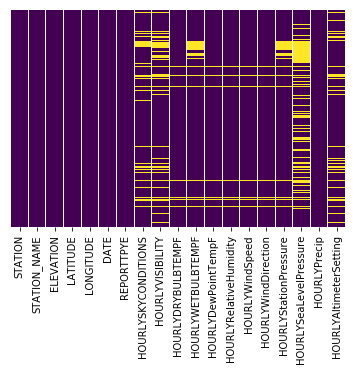

In [14]:
sns.heatmap(hourlies.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
#Drop SeaLevelPressure
hourlies.drop(['HOURLYSeaLevelPressure'], axis = 1, inplace = True )

In [16]:
hourlies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306890 entries, 0 to 1306889
Data columns (total 18 columns):
STATION                   1306890 non-null object
STATION_NAME              1306890 non-null object
ELEVATION                 1306890 non-null float64
LATITUDE                  1306890 non-null float64
LONGITUDE                 1306890 non-null float64
DATE                      1306890 non-null object
REPORTTPYE                1306890 non-null object
HOURLYSKYCONDITIONS       1099558 non-null object
HOURLYVISIBILITY          1041905 non-null object
HOURLYDRYBULBTEMPF        1268140 non-null object
HOURLYWETBULBTEMPF        1185494 non-null float64
HOURLYDewPointTempF       1267679 non-null object
HOURLYRelativeHumidity    1267627 non-null float64
HOURLYWindSpeed           1267740 non-null object
HOURLYWindDirection       1264117 non-null object
HOURLYStationPressure     1187112 non-null object
HOURLYPrecip              1306890 non-null float64
HOURLYAltimeterSetting    11073

### Changing more data types

It's time to change some of the datatypes to floats.  In the data 's' stands for a suspect measurement.  I removed the 's's, but I probably should have explored this a bit more.

In [ ]:
#Change to appropriate type and view the errors
#hourlies['HOURLYDRYBULBTEMPF'] = hourlies['HOURLYDRYBULBTEMPF'].astype('float64', errors = 'raise') #'s' in data
#hourlies['HOURLYStationPressure'] = hourlies['HOURLYStationPressure'].astype('float64', errors = 'raise') #'s' in data
#hourlies['HOURLYDewPointTempF'] = hourlies['HOURLYDewPointTempF'].astype('float64', errors = 'raise') #'s' in data
#hourlies['HOURLYWindSpeed'] = hourlies['HOURLYWindSpeed'].astype('float64', errors = 'raise') #'s' in data
#hourlies['HOURLYAltimeterSetting'] = hourlies['HOURLYAltimeterSetting'].astype('float64', errors = 'raise') #s in data

In [17]:
#Get rid of the 's' in the data
cols = ['HOURLYDRYBULBTEMPF', 'HOURLYStationPressure', 'HOURLYDewPointTempF', 'HOURLYWindSpeed', 'HOURLYAltimeterSetting']

for i in cols:
    hourlies[i] = hourlies[i].str.strip('s')
    hourlies[i] = hourlies[i].astype('float64')

In [18]:
#Drop visilbility kept around 2000 more data points.
hourlies.drop(['HOURLYVISIBILITY'], axis = 1, inplace = True )

In [19]:
#Form new hourlies dataframe with no nulls and all in the right formats, hopefully
hourlies2 = hourlies.dropna()

In [20]:
hourlies2.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1002803 entries, 0 to 1306888
Data columns (total 17 columns):
STATION                   1002803 non-null object
STATION_NAME              1002803 non-null object
ELEVATION                 1002803 non-null float64
LATITUDE                  1002803 non-null float64
LONGITUDE                 1002803 non-null float64
DATE                      1002803 non-null object
REPORTTPYE                1002803 non-null object
HOURLYSKYCONDITIONS       1002803 non-null object
HOURLYDRYBULBTEMPF        1002803 non-null float64
HOURLYWETBULBTEMPF        1002803 non-null float64
HOURLYDewPointTempF       1002803 non-null float64
HOURLYRelativeHumidity    1002803 non-null float64
HOURLYWindSpeed           1002803 non-null float64
HOURLYWindDirection       1002803 non-null object
HOURLYStationPressure     1002803 non-null float64
HOURLYPrecip              1002803 non-null float64
HOURLYAltimeterSetting    1002803 non-null float64
dtypes: float64(11), objec

 ### I felt okay with this data set, as I still retained over 1,000,000 data points. 

In [21]:
#Finally, change date to datetime
hourlies2.loc[:,'DATE'] = pd.to_datetime(hourlies2['DATE'])  #Seems to work despite error

C:\Users\Owner\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [22]:
hourlies2.loc[365*24*3+50, 'DATE']  

Timestamp('2014-10-27 03:51:00')

In [23]:
hourlies.loc[365*24*3+50, 'DATE']  #Looks like the date time worked out ok despite the error

'2014-10-27 03:51'

In [24]:
#Set Index by Station Name
hourlies2.set_index("STATION_NAME", inplace=True)

In [25]:
#Double Check the number of samples from each sample
hourlies2.groupby(['STATION_NAME']).count() #Baltimore took a major hit, remove it

,STATION,ELEVATION,LATITUDE,LONGITUDE,DATE,REPORTTPYE,HOURLYSKYCONDITIONS,HOURLYDRYBULBTEMPF,HOURLYWETBULBTEMPF,HOURLYDewPointTempF,HOURLYRelativeHumidity,HOURLYWindSpeed,HOURLYWindDirection,HOURLYStationPressure,HOURLYPrecip,HOURLYAltimeterSetting
STATION_NAME,,,,,,,,,,,,,,,,
AKRON CANTON AIRPORT OH US,51449,51449,51449,51449,51449,51449,51449,51449,51449,51449,51449,51449,51449,51449,51449,51449
ALAMOSA SAN LUIS VALLEY REGIONAL AIRPORT CO US,48327,48327,48327,48327,48327,48327,48327,48327,48327,48327,48327,48327,48327,48327,48327,48327
ALBUQUERQUE INTERNATIONAL AIRPORT NM US,46152,46152,46152,46152,46152,46152,46152,46152,46152,46152,46152,46152,46152,46152,46152,46152
BALTIMORE WASHINGTON INTERNATIONAL AIRPORT MD US,3462,3462,3462,3462,3462,3462,3462,3462,3462,3462,3462,3462,3462,3462,3462,3462
BEND MUNICIPAL AIRPORT OR US,49392,49392,49392,49392,49392,49392,49392,49392,49392,49392,49392,49392,49392,49392,49392,49392
BURLINGTON WEATHER SERVICE OFFICE AIRPORT VT US,55751,55751,55751,55751,55751,55751,55751,55751,55751,55751,55751,55751,55751,55751,55751,55751
CARIBOU WEATHER FORECAST OFFICE ME US,67139,67139,67139,67139,67139,67139,67139,67139,67139,67139,67139,67139,67139,67139,67139,67139
CHARLESTON INTL. AIRPORT SC US,53200,53200,53200,53200,53200,53200,53200,53200,53200,53200,53200,53200,53200,53200,53200,53200
DETROIT CITY AIRPORT MI US,54701,54701,54701,54701,54701,54701,54701,54701,54701,54701,54701,54701,54701,54701,54701,54701


In [26]:
hourlies3 = hourlies2.drop('BALTIMORE WASHINGTON INTERNATIONAL AIRPORT MD US')
hourlies3.info()  

<class 'pandas.core.frame.DataFrame'>
Index: 999341 entries, AKRON CANTON AIRPORT OH US to WICHITA DWIGHT D. EISENHOWER NATIONAL AIRPORT KS US
Data columns (total 16 columns):
STATION                   999341 non-null object
ELEVATION                 999341 non-null float64
LATITUDE                  999341 non-null float64
LONGITUDE                 999341 non-null float64
DATE                      999341 non-null datetime64[ns]
REPORTTPYE                999341 non-null object
HOURLYSKYCONDITIONS       999341 non-null object
HOURLYDRYBULBTEMPF        999341 non-null float64
HOURLYWETBULBTEMPF        999341 non-null float64
HOURLYDewPointTempF       999341 non-null float64
HOURLYRelativeHumidity    999341 non-null float64
HOURLYWindSpeed           999341 non-null float64
HOURLYWindDirection       999341 non-null object
HOURLYStationPressure     999341 non-null float64
HOURLYPrecip              999341 non-null float64
HOURLYAltimeterSetting    999341 non-null float64
dtypes: datetime64[ns

In [27]:
hourlies3.to_pickle('hourlies.pickle') #Looks good, PICKLE it!